In [8]:
import sys
sys.path.append('../')

from envs.GridMaps import *
from utilities.transitionDatasetGeneration import *

In [9]:
shape = "14x14"
NoWalls = False

if shape == "5x5":
    maze = maze5x5["maze"]
    # Folder containing your saved models
    folder_name = '5x5_5_modelv2'
    hidden_size = 32
elif shape == "14x14":

    if NoWalls:
        maze = NoWalls_maze14x14["maze"]
        folder_name = 'NoWalls_5_model'
    else:
        maze = maze14x14["maze"]
        # Folder containing your saved models
        #folder_name = 'mode3'
        folder_name = '5_modelv2'
    hidden_size = 512

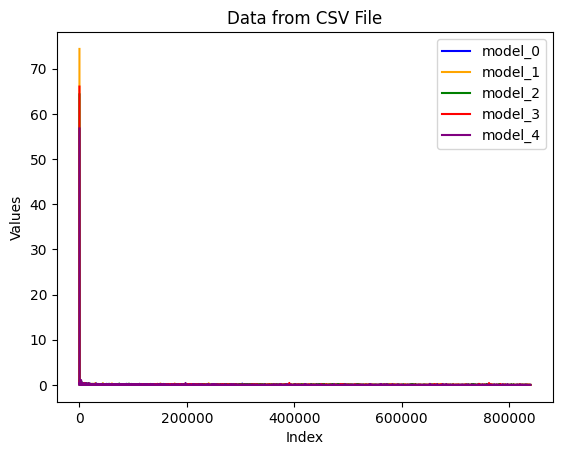

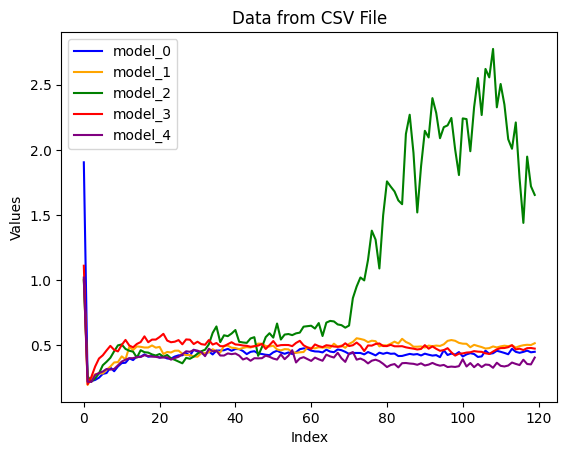

In [10]:
plot_train_losses(folder_name)
plot_val_losses(folder_name)

In [11]:
models_arr = load_models(folder_name, hidden_size=hidden_size)

Loading models from folder: ../data/OfflineEnsembles/5_modelv2/
Loading model: model_0.pt
Loading model: model_1.pt
Loading model: model_2.pt
Loading model: model_3.pt
Loading model: model_4.pt


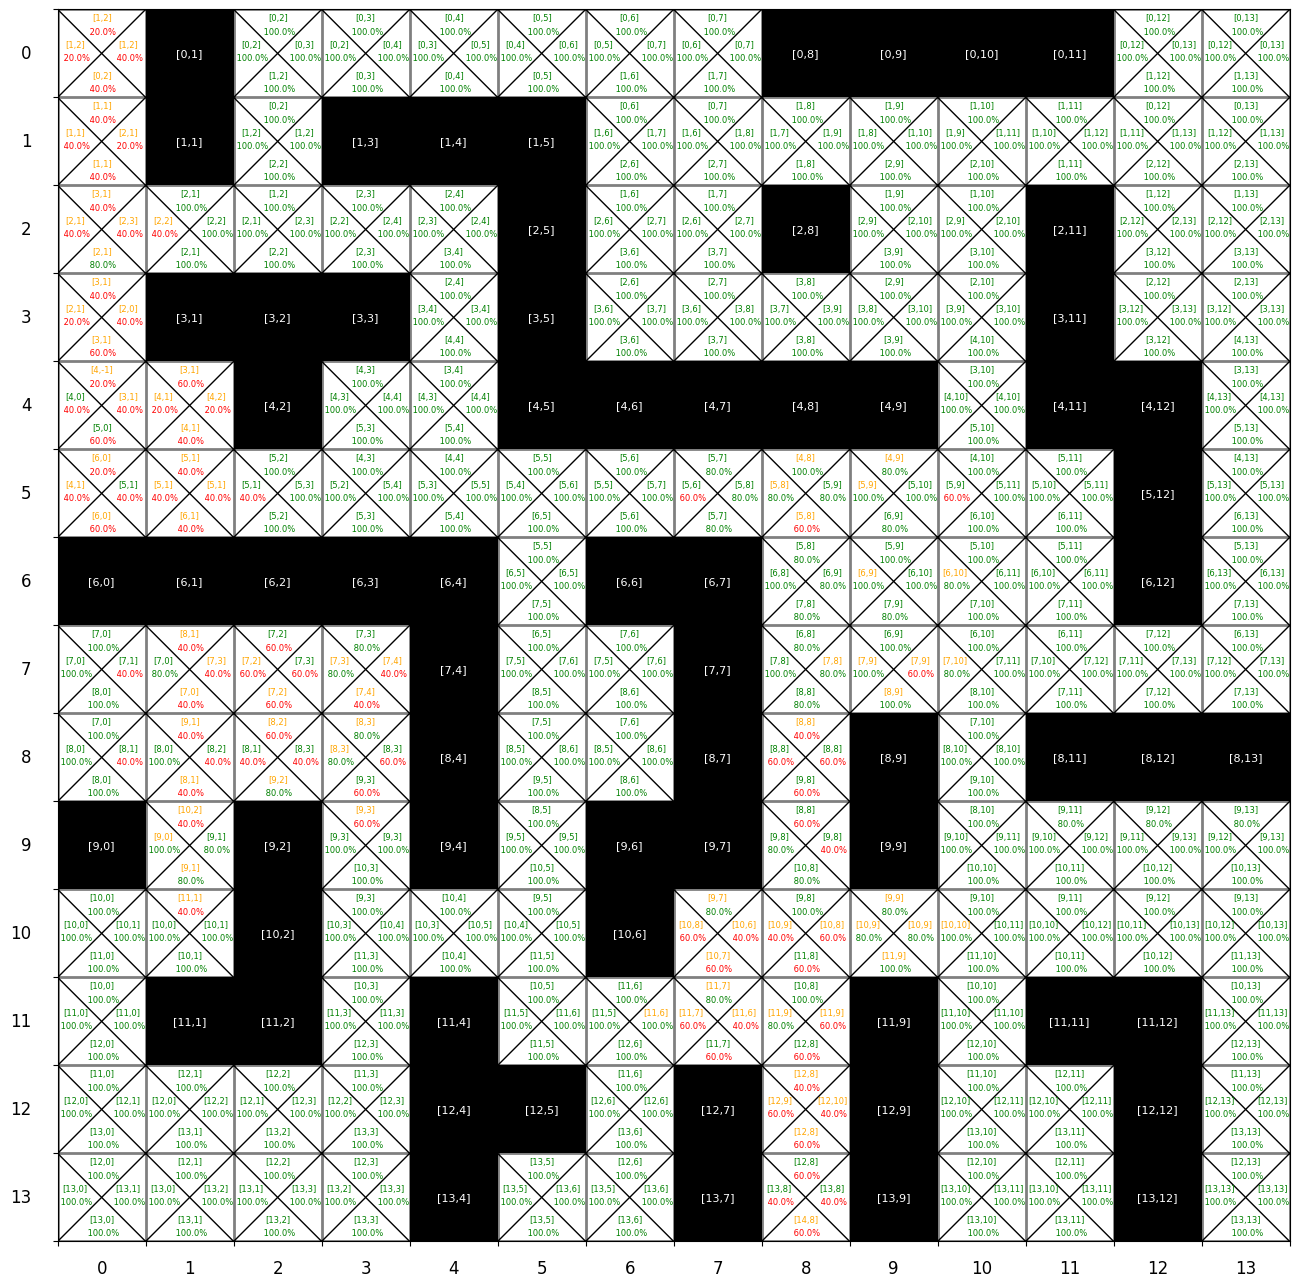

In [12]:
probMapper(maze, models_arr, threshold=80.0)

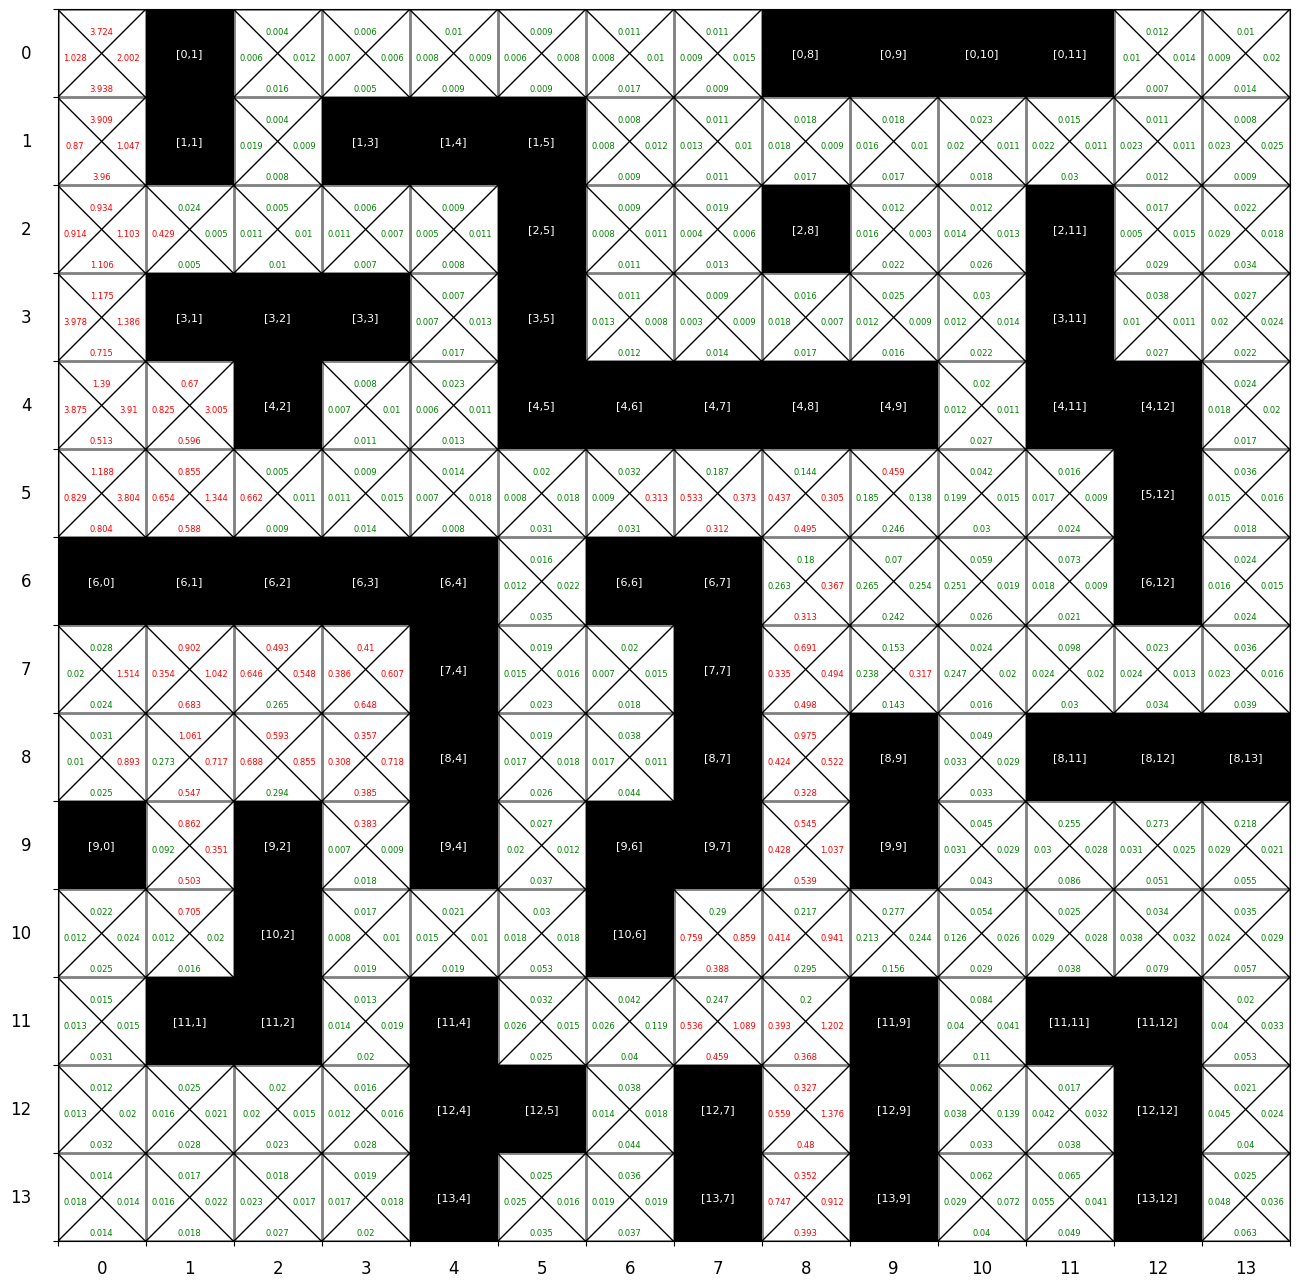

In [13]:
stdMapper(maze, models_arr, threshold=0.3)

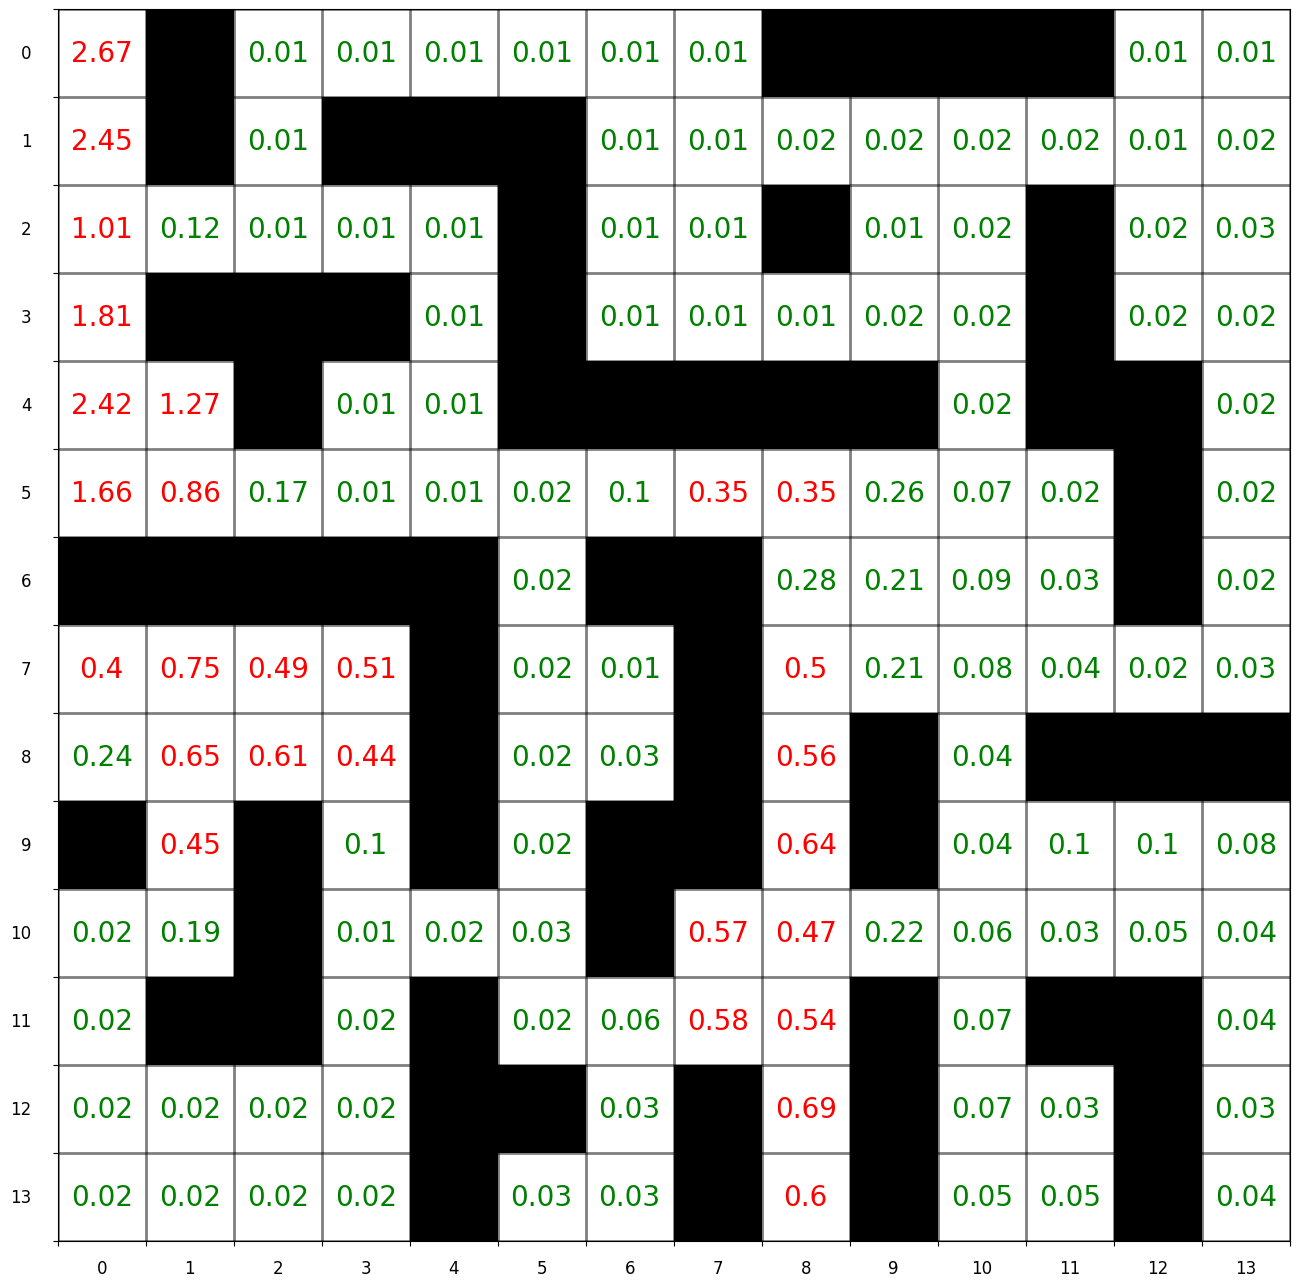

In [14]:
stdMeanMapper(maze, models_arr, threshold=0.3)